In [14]:
import numpy as np
from scipy.signal import lfilter, butter
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [15]:
def load_subject_data(subject, filetype, start_series, end_series):
    ''' Loads the data or events specified as filetype for a subject. The series
    are specified to build a training and testing sets. '''
    path = r'C:/Users/tomry/Documents/EEG/train/'
    series = range(start_series, end_series+1)
    subject_data = []
    for serie in series:
        data_filename = path + 'subj%d_series%d_%s.csv' % (subject, serie, filetype)
        data = pd.read_csv(data_filename)
        subject_data.append(data)
    subj_data = pd.concat(subject_data)
    subj_data.drop('id', inplace=True, axis=1)
    return subj_data.to_numpy()

In [16]:
subject = 1

In [17]:
x_train = load_subject_data(subject, 'data', 1, 6)

In [18]:
def causal_filt(x, cutoffs, fs=500, btype='bandpass'):
    ''' Applies a causal IIR filter to x. '''
    b, a = butter(4, cutoffs, fs=fs, btype=btype)
    x_filtered = lfilter(b, a, x, axis=0)
    return x_filtered

def downsample(x, n=3, start=0):
    ''' Downsamples the signals in x by taking every nth sample. '''
    return x[start::n, :]

def decimate(x):
    ''' Decimate the signal by filtering and downsampling. '''
    x = causal_filt(x, [0.5, 80])
    x = downsample(x)
    return x

In [19]:
x_train_processed = decimate(x_train)

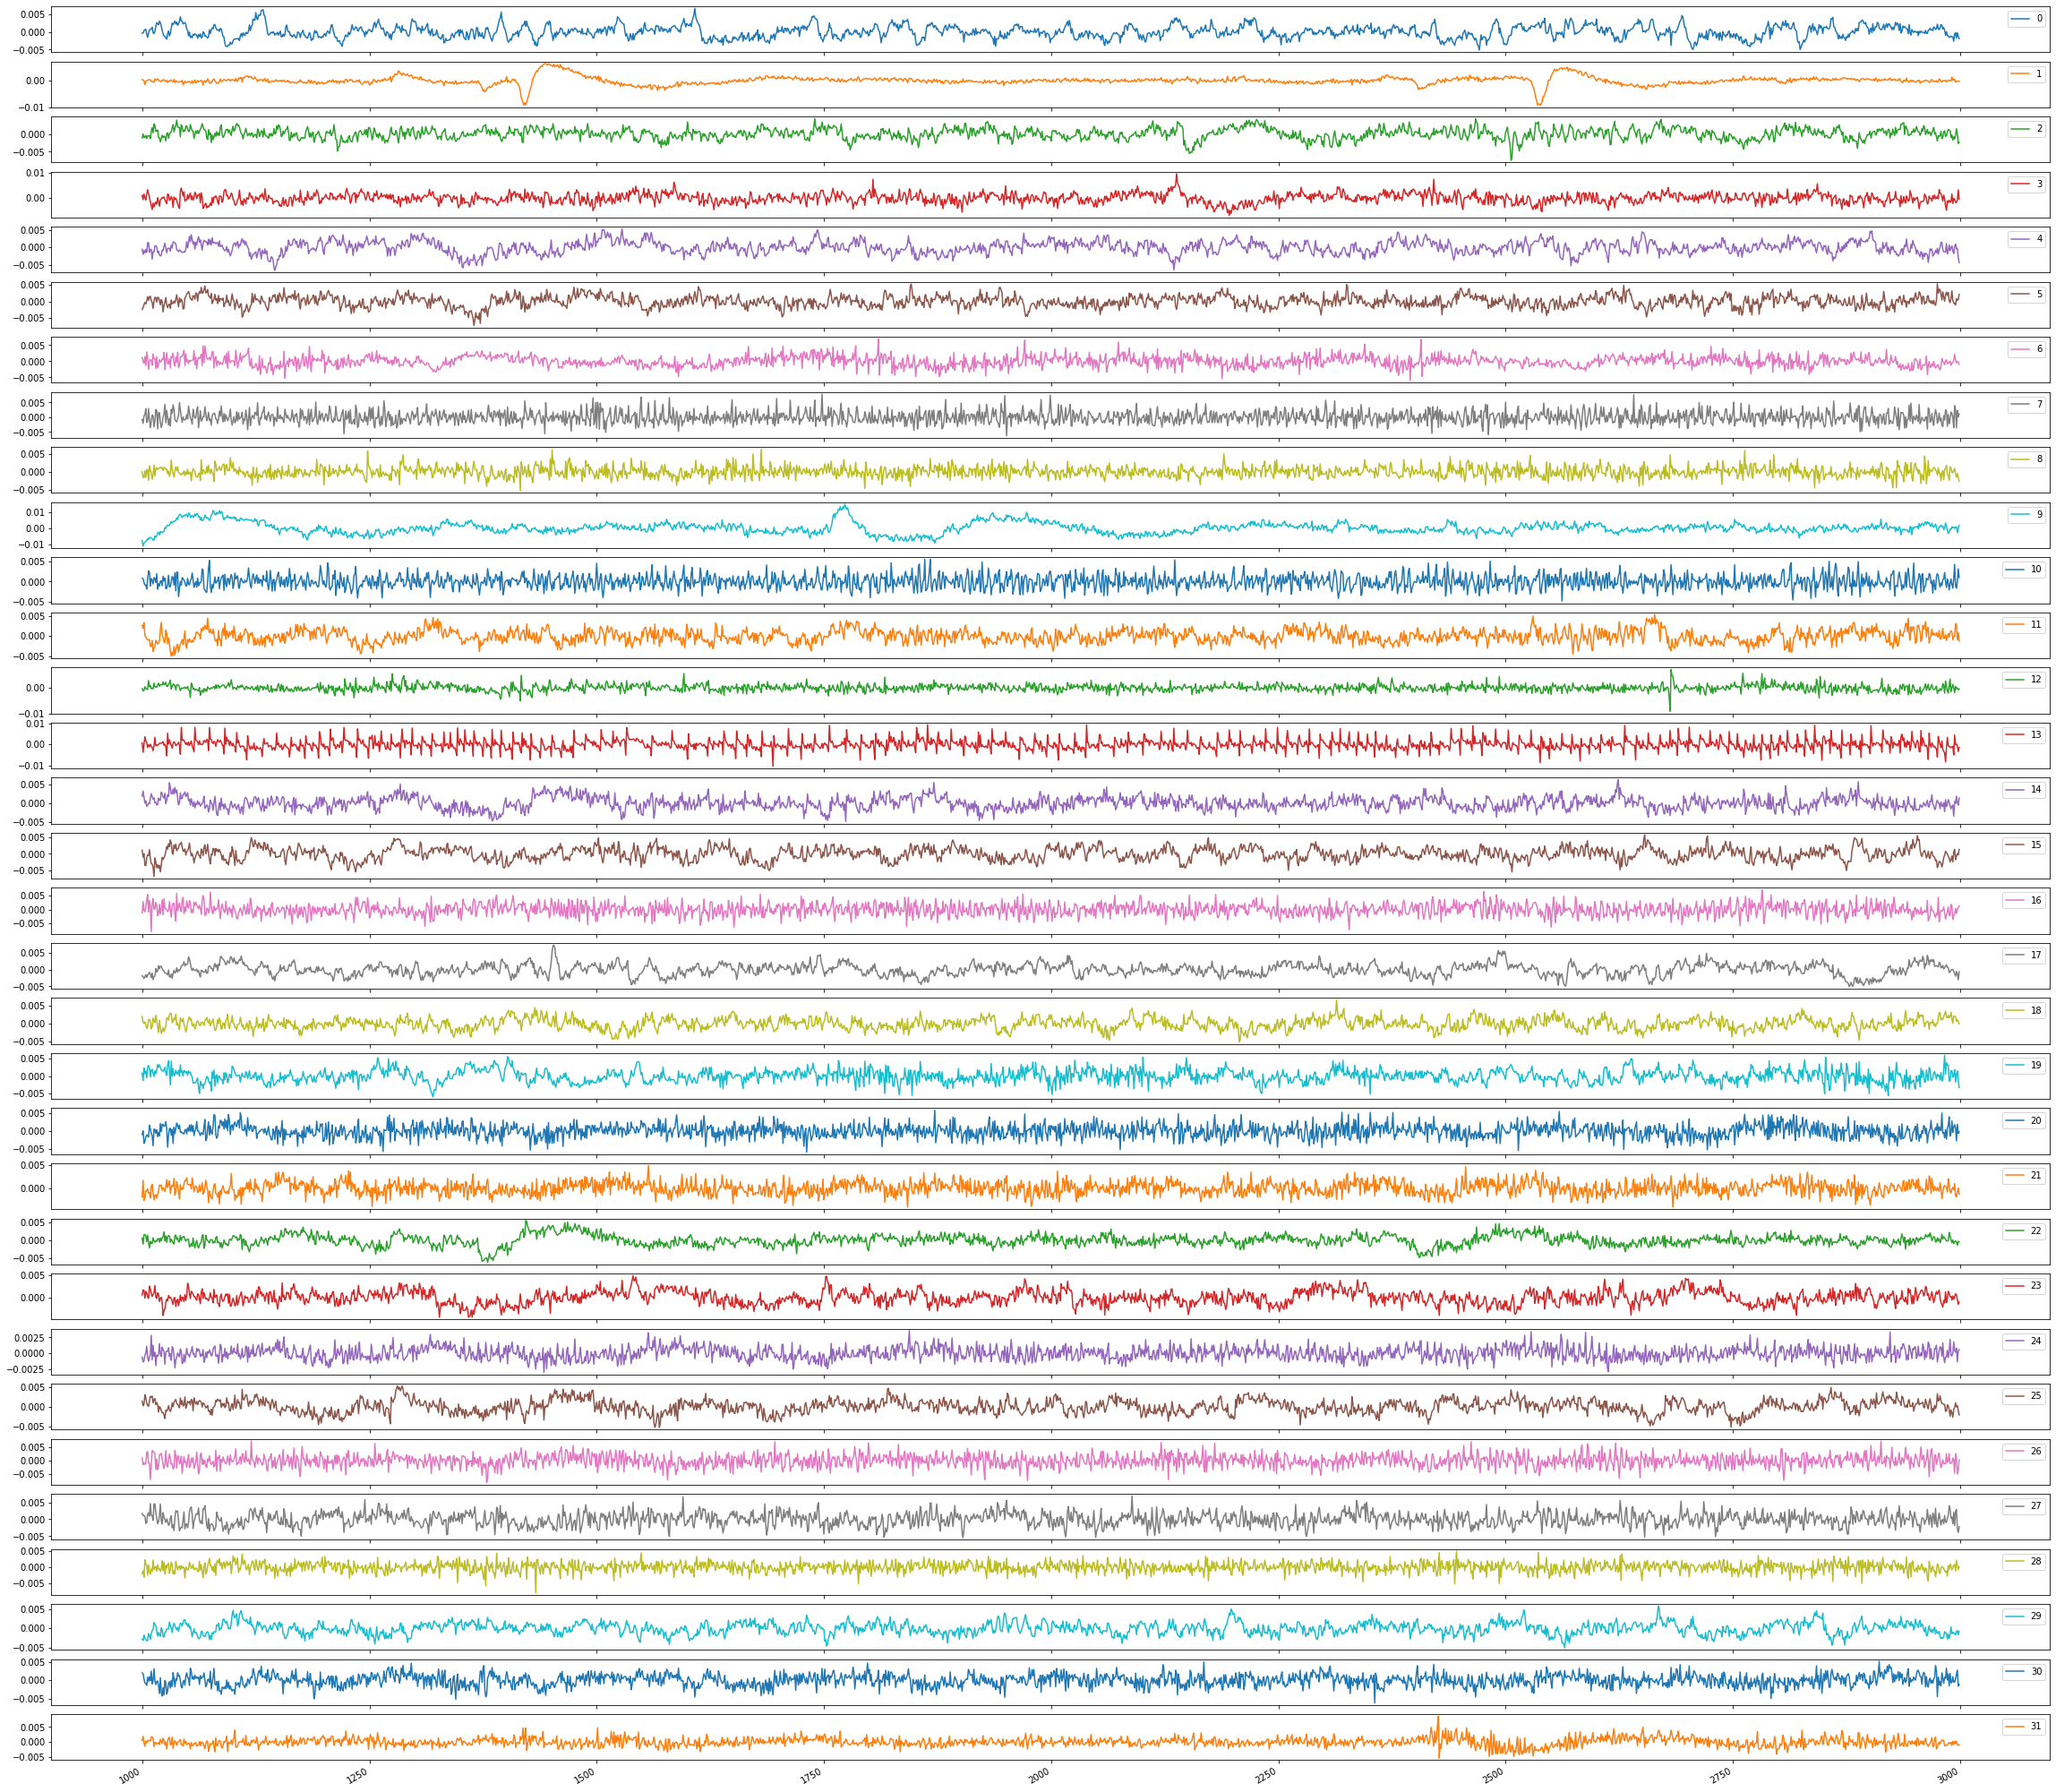

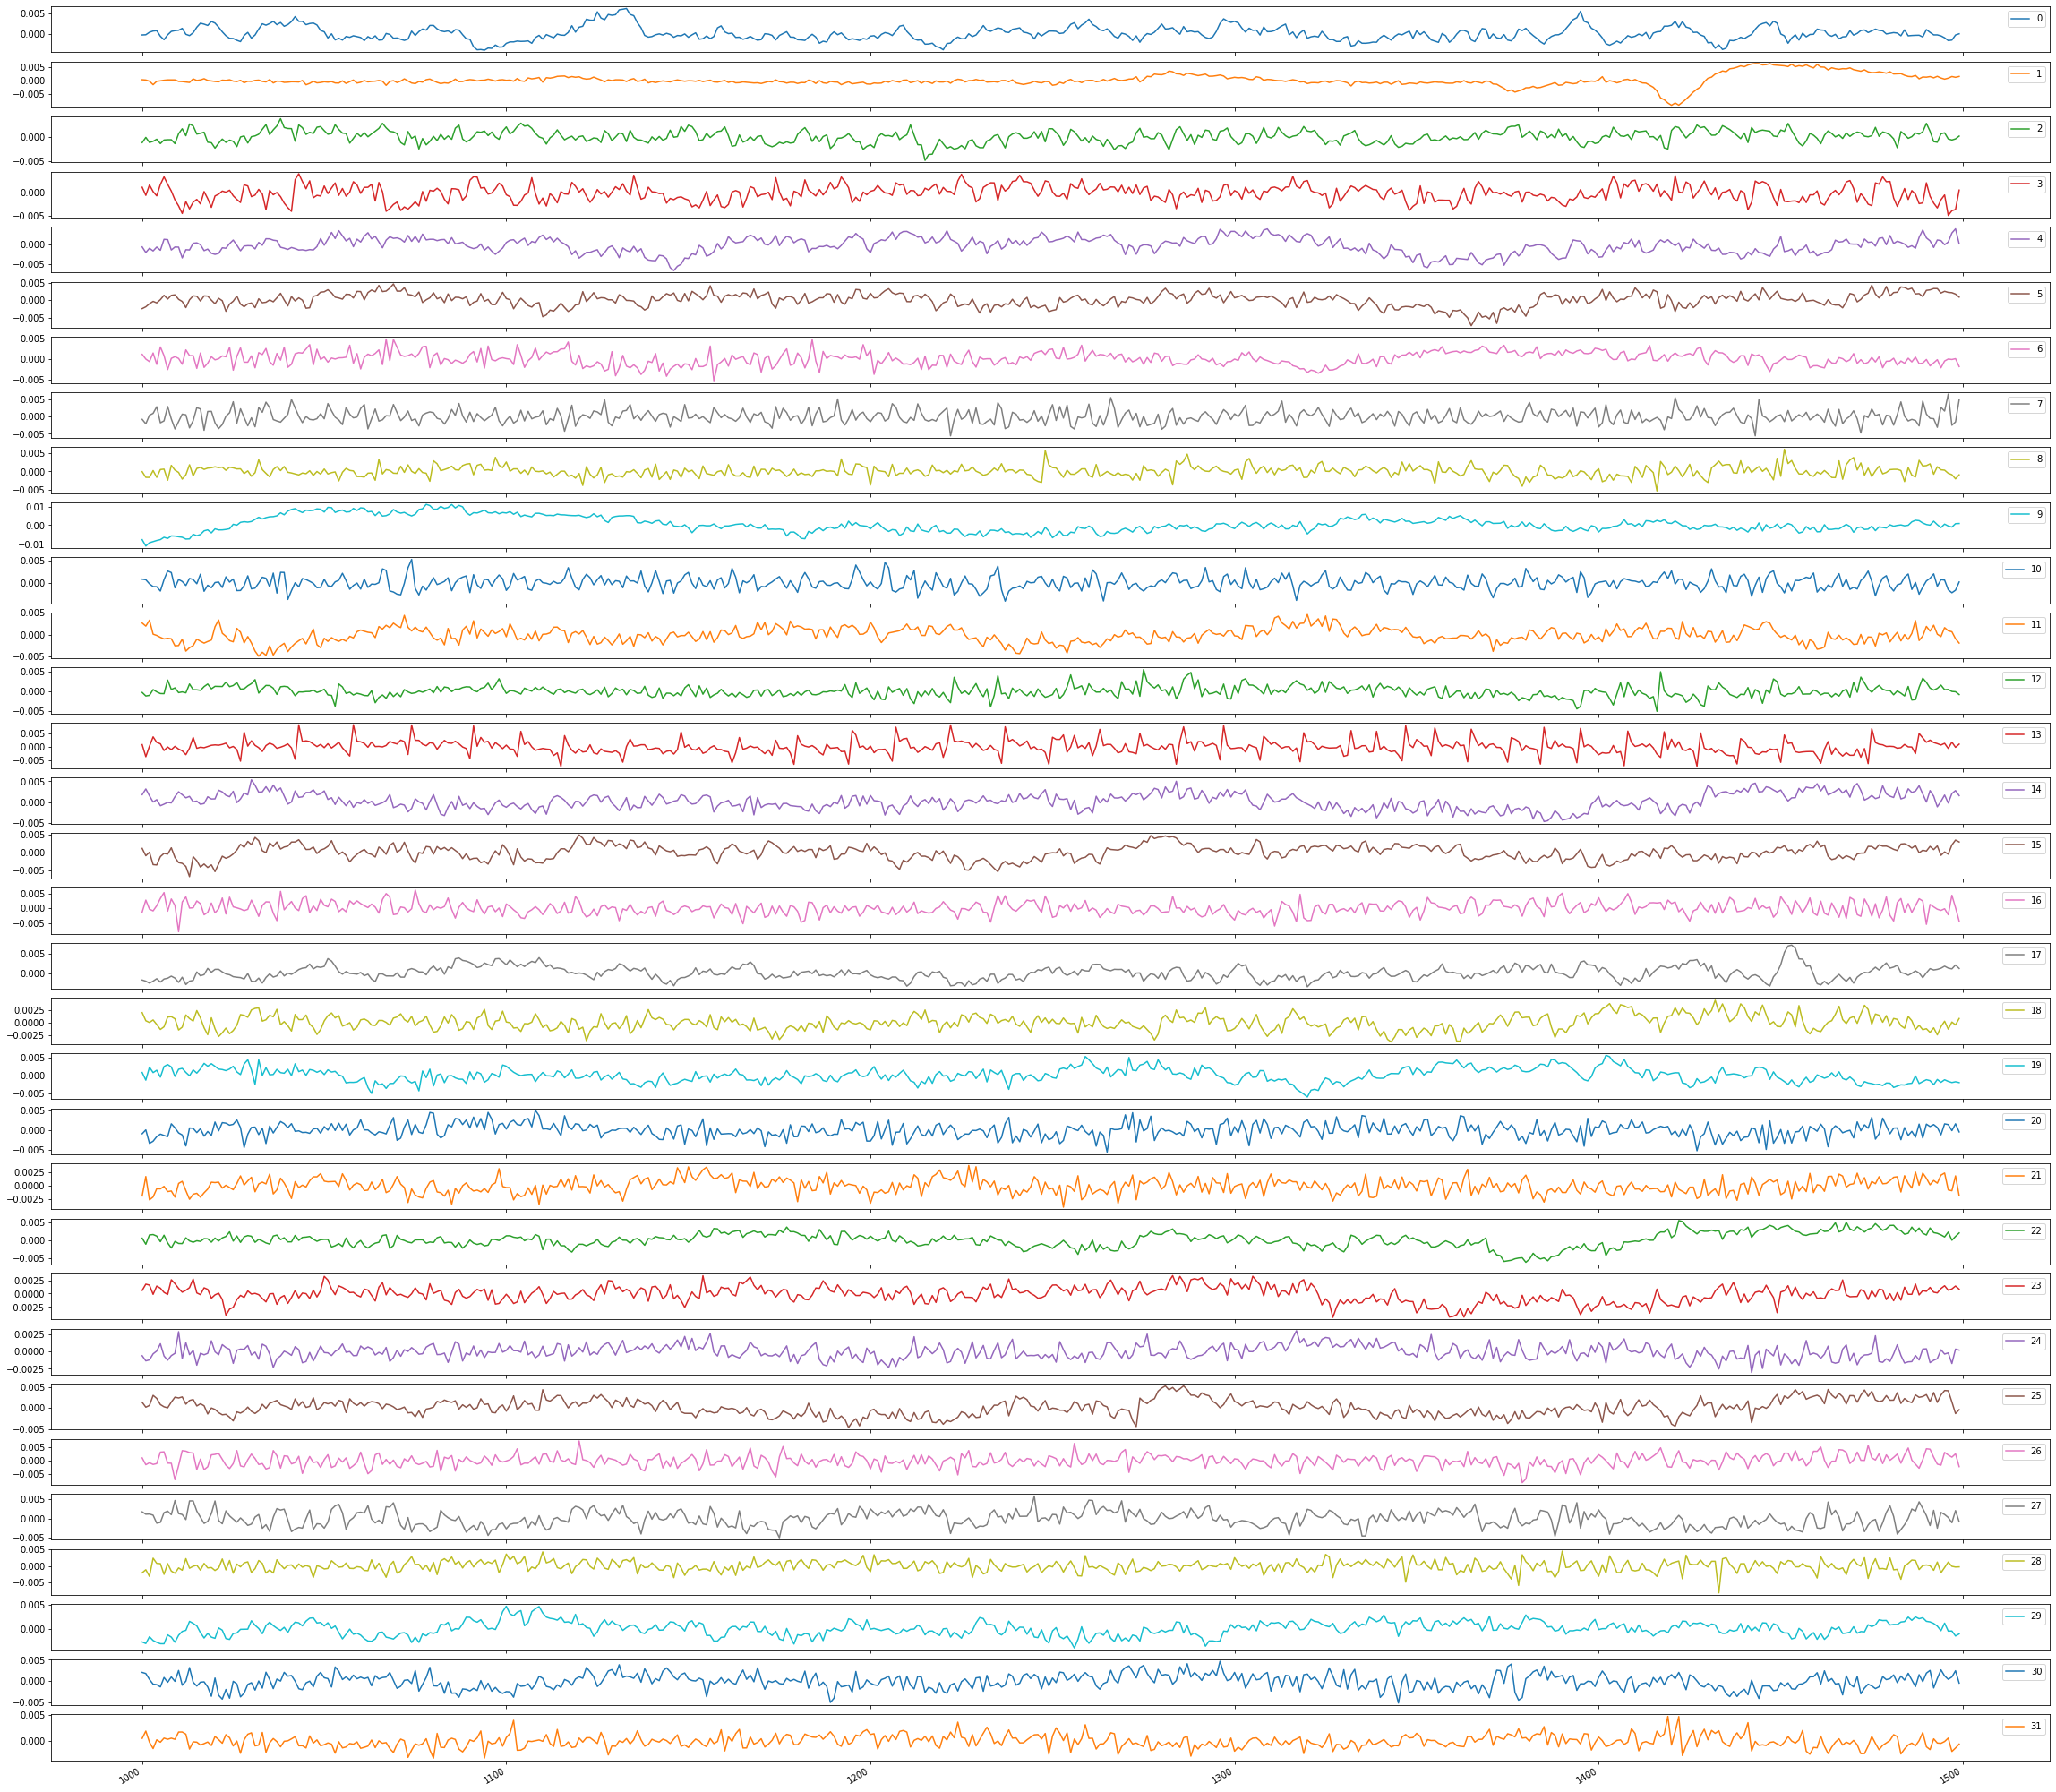

In [20]:
ica = FastICA().fit(x_train_processed)
independent_sources = ica.transform(x_train_processed)
# plot channels for manual inspection
independent_sources_df = pd.DataFrame(data=independent_sources)
independent_sources_df.iloc[1000:3000,:].plot(subplots=True, figsize=(40,40))
plt.show()
independent_sources_df.iloc[1000:1500,:].plot(subplots=True, figsize=(40,40))
plt.show()

In [21]:
independent_sources[:, 1] = 0
x_clean = ica.inverse_transform(independent_sources)

In [64]:
def plot_(x, a, b=1):
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
    
    ax[0].plot(x[2000:int(a*b),0], 'b')
    ax[0].set_ylim([-1000,3200])
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    
    ax[1].plot(x[2000:int(a*b),1], 'orange')
    ax[1].set_ylim([-1000,3200])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    
    ax[2].plot(x[2000:int(a*b),2], 'g') 
    ax[2].set_ylim([-1000,3200])
    ax[2].set_xticklabels([])
    ax[2].set_yticklabels([])

    plt.show()

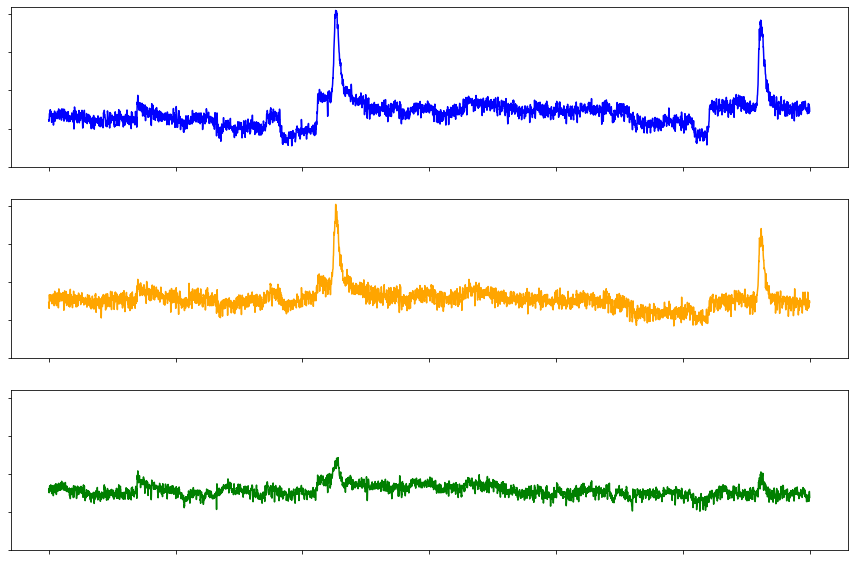

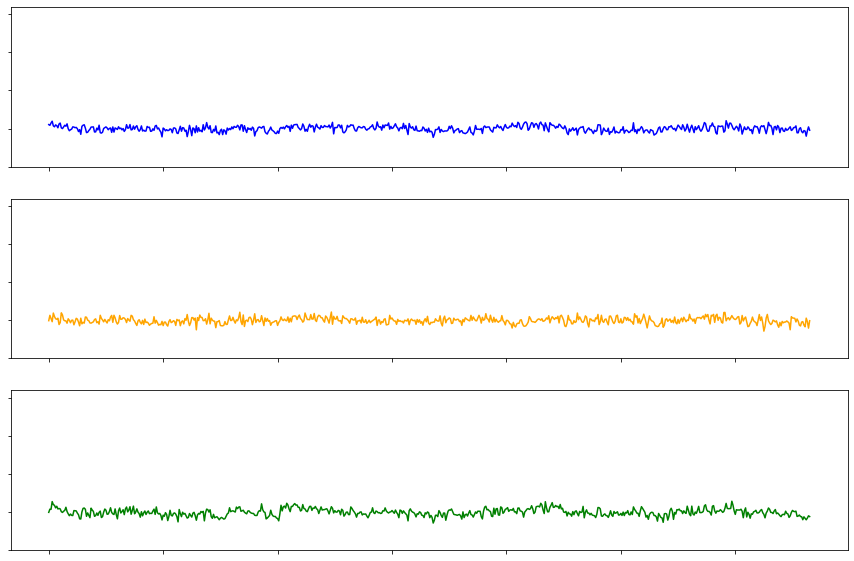

In [65]:
plot_(x_train, a=8000)
plot_(x_clean, a=8000, b=1/3)